<a href="https://colab.research.google.com/github/Manuelstv/mecanica-quantica/blob/main/funcaoOnda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Esse trabalho foi produzido em google collaboratory exclusivamente por mim. Nenhuma parte deste trabalho (texto e fórmulas) foram copiadas digitalmente de outras fontes.

Manuel Veras

In [1]:
%matplotlib inline
from matplotlib import animation
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
from scipy.misc import derivative
import seaborn as sns

# Parte 1:


In [2]:
# usando uma função densidade de probabilidade gaussiana.
def P(x,t):
  a = 1
  sigma = 20 + 0.1*t
  return (2*np.pi*sigma**2)**-0.5*np.exp(-(x+a*t)**2/(2*sigma**2))

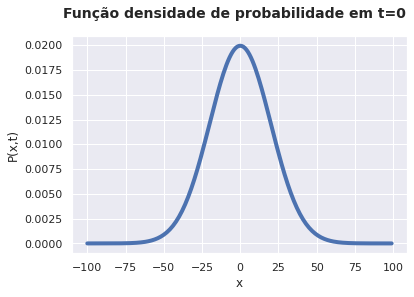


Probabilidade de min à max: 1.0
Valor esperado da posição <x>: 0.0
Valor esperado quadrado da posição <x**2>: 400.0
Desvio padrão (sigma): 20


In [3]:
x = np.arange(-100,100,1)
sns.set()
plt.plot(x,P(x,0), lw=4)
plt.xlabel("x")
plt.ylabel("P(x,t)")
plt.suptitle("Função densidade de probabilidade em t=0",fontsize=14, fontweight='bold')
plt.show()

#limites inferior e superior das integrais.
min = -np.inf
max = np.inf

#prob de min a max
probabilidade = integrate.quad(lambda x: P(x,0), min, max)
#valor esperado de x
media = integrate.quad(lambda x: P(x,0)*x, min, max)
#valor esperado x^2
media_x2 = integrate.quad(lambda x: P(x,0)*x**2, min, max)

print("\nProbabilidade de min à max:", round(probabilidade[0],2))
print("Valor esperado da posição <x>:", round(media[0],2))
print("Valor esperado quadrado da posição <x**2>:", round(media_x2[0],2))
print("Desvio padrão (sigma):", round((-media[0]**2+media_x2[0])**0.5))

# Parte 2:

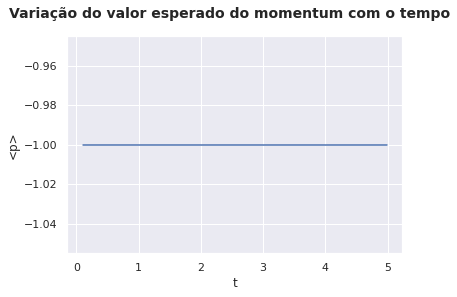

In [4]:
#massa da particula
m=1
#diferencial de tempo;
dt = 0.01
time = np.arange(0.1,5,dt)
momentum =[]

for t in time:
  #diferencial da função
  df = integrate.quad(lambda x :x*P(x,t+dt)-x*P(x,t),-np.inf,np.inf)     
  momentum.append(round(m*df[0]/dt,2))

plt.plot(time,momentum)
plt.xlabel("t")
plt.ylabel("<p>")
plt.suptitle("Variação do valor esperado do momentum com o tempo",fontsize=14, fontweight='bold')
print("")

# Parte 3:


Celula não roda imediatamente; demora uns 2 min. 

Não é possivel vizualizar a animação direto no collab, mas ele gera o arquivo .mp4 que pode ser baixado.

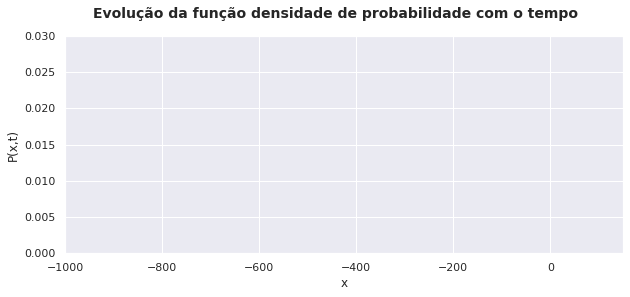

In [ ]:
sns.set()
fig = plt.figure(figsize = (10,4))
ax = plt.axes(xlim = (-1000,150), ylim = (0,0.03))

#funcoes utilizadas como parametro para animacao
def inicializar():
  linha.set_data([],[])
  return linha,

def atualizar(t):
  x = np.linspace(-1000, 150, 200)
  y = P(x,t)
  linha.set_data(x, y)
  return linha,

linha, = ax.plot([],[],lw=4)

plt.xlabel("x")
plt.ylabel("P(x,t)")
plt.suptitle("Evolução da função densidade de probabilidade com o tempo",fontsize=14, fontweight='bold')
#plt.tight_layout()

animacao = animation.FuncAnimation(fig, atualizar, init_func=inicializar,
                               frames=900, interval=20, blit=False)

animacao.save('animacao.mp4')